# Problem Set 2 - Collusion & Entry

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.set_index(['year'], inplace=True)
df['Qc'] = df.Q - df.q_fri

In [3]:
df

,I_cartel,P,Q,q_basf,q_emerck,q_roche,q_takeda,q_fri,Qc
year,,,,,,,,,
1980,0,10.932500,2.68177,0.00000,0.34863,1.36770,0.48272,0.48272,2.19905
1981,0,11.659167,2.89156,0.00000,0.34699,1.56144,0.52048,0.46265,2.42891
1982,0,11.310000,2.73986,0.13699,0.32878,1.47953,0.52057,0.27399,2.46587
1983,0,10.857500,2.88158,0.14408,0.31697,1.52724,0.54750,0.34579,2.53579
1984,0,10.525000,2.95320,0.20672,0.35438,1.62426,0.53158,0.23626,2.71694
1985,1,9.956667,2.94722,0.14736,0.35367,1.62097,0.53050,0.29472,2.65250
1986,1,9.964167,3.02046,0.15102,0.30205,1.63105,0.60409,0.33225,2.68821
1987,1,11.140833,3.10553,0.15528,0.21739,1.83226,0.59005,0.31055,2.79498
1988,1,12.461667,3.26616,0.16331,0.35928,1.82905,0.65323,0.26129,3.00487


## 1. Introductory graphical analysis

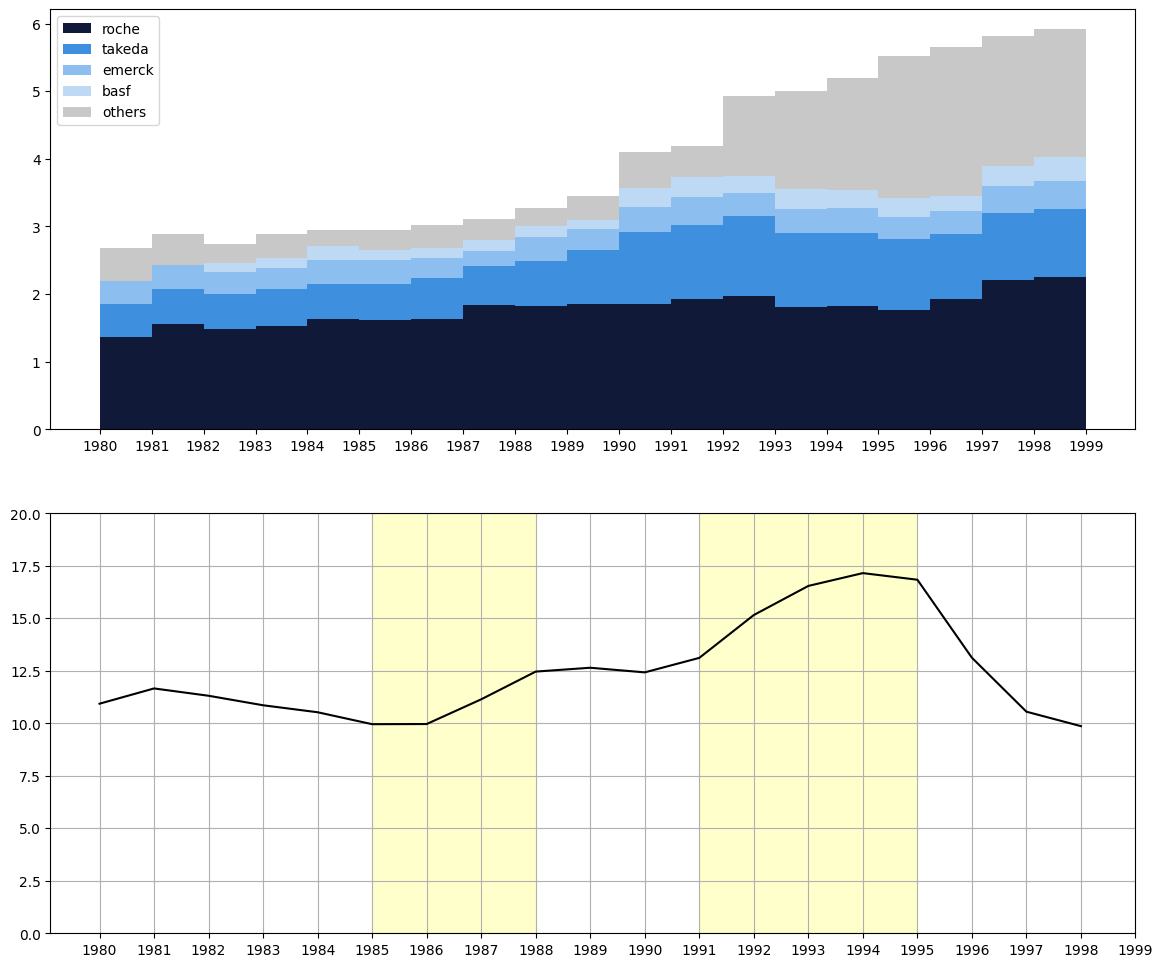

In [4]:
market = {
    'roche': df.q_roche,
    'takeda': df.q_takeda,
    'emerck': df.q_emerck,
    'basf': df.q_basf,
    'others': df.q_fri,
}

colors = {
    'roche': [val/255 for val in [17,25,57]],
    'takeda': [val/255 for val in [62,143,222]],
    'emerck': [val/255 for val in [140,190,240]],
    'basf': [val/255 for val in [190,217,244]],
    'others': [val/255 for val in [200,200,200]],
}

cartel_years_1 = range(1985,1989)
cartel_years_2 = range(1991,1996)
#plt.stackplot(df.year, df.q_roche, df.q_takeda, df.q_emerck, df.q_basf, df.q_fri, labels=['Roche','Takeda','Merck', 'BASF', 'Others'])
#plt.legend(loc='upper left')

fig, ax = plt.subplots(2,1,figsize=(14,12))
baseline = np.zeros((df.shape[0]))
edges = df.index.get_level_values('year').to_list() + [1999]
for firm, prod in market.items():
    ax[0].stairs(baseline+prod, edges=edges, baseline=baseline, fill=True, label=firm, color=colors[firm])
    baseline = baseline+prod
ax[0].set_xticks(edges)
ax[0].set_xticklabels(edges)
ax[0].legend(loc='upper left')

ax[1].plot(df.P, color='black')
ax[1].axvspan(cartel_years_1[0], cartel_years_1[-1], color='yellow', alpha=0.2)
ax[1].axvspan(cartel_years_2[0], cartel_years_2[-1], color='yellow', alpha=0.2)
ax[1].set_xticks(edges)
ax[1].set_xticklabels(edges)
ax[1].set_ylim(0,20)
ax[1].grid()

## Calibration of costs and demand model

## 2. Cournot Quantity competition

Market demand:
$$Q_t^D = \alpha_1 P_t + \epsilon_t $$

where $\epsilon_t$ refers to the effective demand shifter.

Demand facing non-fringe firms:
$$Q_{C,t} = Q_t^D - Q_{F,t}$$

Maximization problem facing firms:
$$max_{q_{j,t}}{\bigg[ q_{j,t}\big( P_t(Q_{j,t}) - c_{j,t} \big) \bigg]}$$
The corresponding FOC yields:
$$P_t(Q_{j,t}) + q_{j,t}\frac{dP_t}{dQ_{j,t}} = c_{j,t}$$
leading to:
$$P_t - c_{j,t} = -\frac{1}{\alpha_1} q_{j,t} + \eta_{j,t}$$

### 3. Estimating $\alpha_1$ from Roche's marginal cost: 

In [5]:
c_roche = 5.9
t0 = 1980
t0c = 1985

df_precartel = df[df.index.get_level_values('year').isin(range(t0,t0c))]
α1 = (df_precartel.q_roche / (c_roche - df_precartel.P)).mean()
print("α1 estimation using Roche's MC: {0:.2f}".format(α1))

α1 estimation using Roche's MC: -0.30


### 4. Estimating other firm's (fringe excluded) marginal costs from this estimate of $\alpha_1$: 

In [6]:
c1 = (((1/α1)*df_precartel[['q_basf', 'q_emerck', 'q_takeda']]).add(df_precartel.P, axis=0)).mean(axis=0)

print("""
Marginal costs estimation from estimated α1:
- BASF: {0:.2f}
- Merck: {1:.2f}
- Takeda: {2:.2f}
""".format(c1['q_basf'], c1['q_emerck'], c1['q_takeda']))

c1 = pd.concat([c1,pd.Series({'q_roche': c_roche})])


Marginal costs estimation from estimated α1:
- BASF: 10.73
- Merck: 9.91
- Takeda: 9.29



### 5. Estimating demand shifters

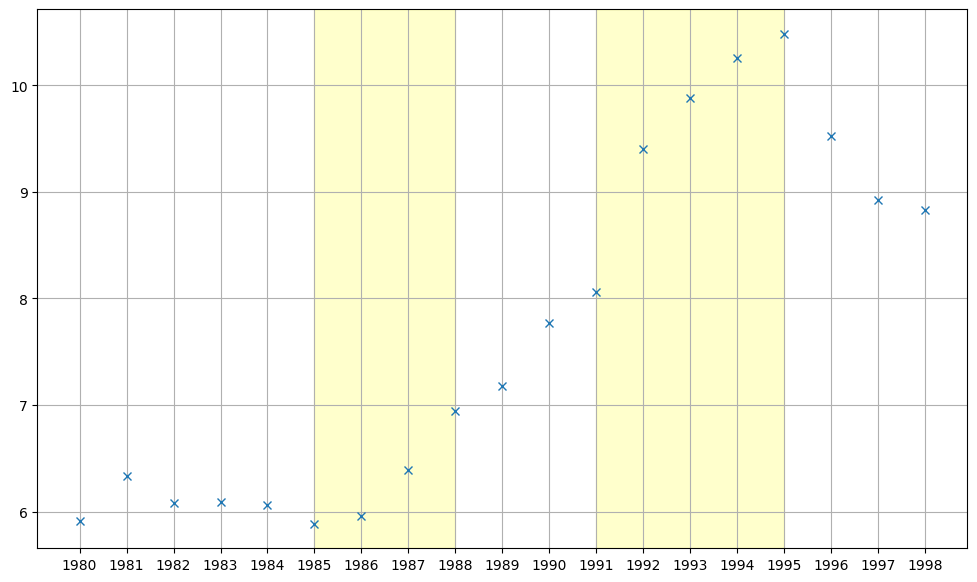

In [7]:
ε1 = df.Q - α1*df.P
ε1.name = "Price shifter estimation"
fig5, ax5 = plt.subplots(figsize=(12,7))
ax5.plot(edges[:-1], ε1, marker='x', linestyle='', label='Estimated dmd shifter')
ax5.set_xticks(edges[:-1]);
ax5.set_xticklabels(edges[:-1]);
ax5.axvspan(cartel_years_1[0], cartel_years_1[-1], color='yellow', alpha=0.2)
ax5.axvspan(cartel_years_2[0], cartel_years_2[-1], color='yellow', alpha=0.2)
ax5.grid()

Alternatively, using all year without cartel:

In [8]:
df_nocartel = df[df.I_cartel==0]
α2 = (df_nocartel.q_roche / (c_roche - df_nocartel.P)).mean()
print("α2 estimation using Roche's MC: {0:.2f}".format(α2))

α2 estimation using Roche's MC: -0.34


In [9]:
c2 = (((1/α2)*df_nocartel[['q_basf', 'q_emerck', 'q_takeda']]).add(df_nocartel.P, axis=0)).mean(axis=0)

print("""
Marginal costs estimation from estimated α1:
- BASF: {0:.2f}
- Merck: {1:.2f}
- Takeda: {2:.2f}
""".format(c2['q_basf'], c2['q_emerck'], c2['q_takeda']))

c2 = pd.concat([c2,pd.Series({'q_roche': c_roche})])


Marginal costs estimation from estimated α1:
- BASF: 10.69
- Merck: 10.16
- Takeda: 9.10



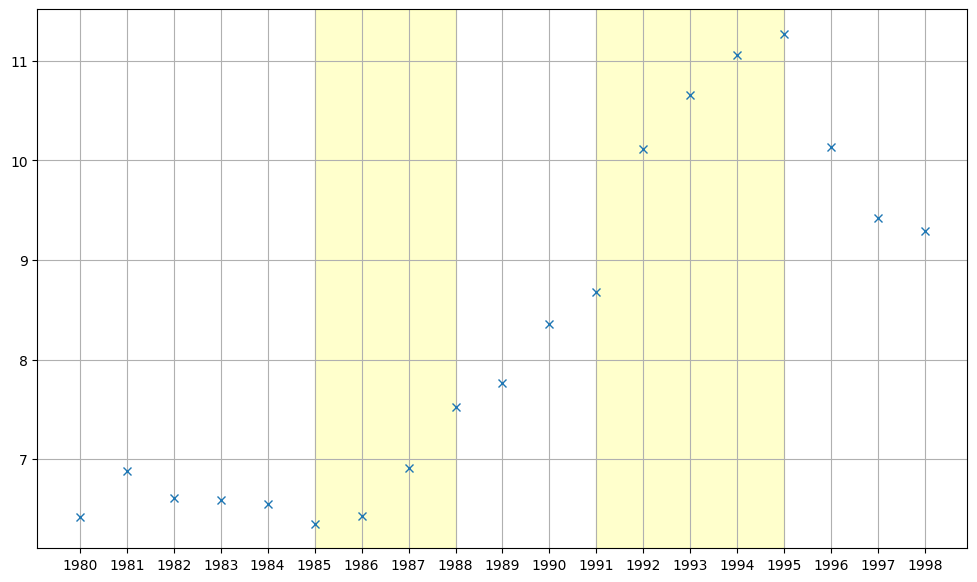

In [10]:
ε2 = df.Q - α2*df.P
ε2.name = "Price shifter estimation"
fig5b, ax5b = plt.subplots(figsize=(12,7))
ax5b.plot(edges[:-1], ε2, marker='x', linestyle='', label='Estimated dmd shifter')
ax5b.set_xticks(edges[:-1]);
ax5b.set_xticklabels(edges[:-1]);
ax5b.axvspan(cartel_years_1[0], cartel_years_1[-1], color='yellow', alpha=0.2)
ax5b.axvspan(cartel_years_2[0], cartel_years_2[-1], color='yellow', alpha=0.2)
ax5b.grid()

### 6. Quasi-monopoly pricing

In the (quasi, there is still a competitive fringe)-monopoly setting, under the assumption that each member firm has no production capacity restrictions, the big firm will choose to use the production technology of the member firm with the lowest marginal cost, in our case Roche's production tech. As a result, the quasi-monopoly program ends up being identical to the program of a cartel where Roche controls production, as is studied in the next questions

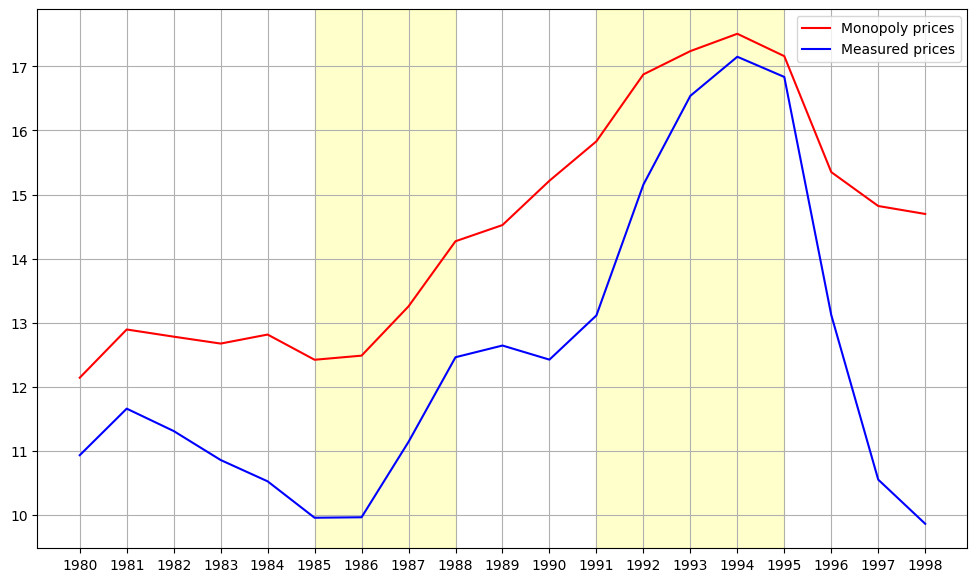

In [11]:
Qmonop = 0.5*(α1*c_roche + ε1 - df.q_fri)
Pmonop = (df.q_fri + Qmonop - ε1)/α1

df["Q_monop"] = Qmonop
df["P_monop"] = Pmonop
fig6, ax6 = plt.subplots(1,1,figsize=(12,7))
ax6.plot(df.index.get_level_values("year"), Pmonop, color='red', label="Monopoly prices")
ax6.plot(df.index.get_level_values("year"), df.P, color='blue', label="Measured prices")
ax6.set_xticks(edges[:-1]);
ax6.set_xticklabels(edges[:-1]);
ax6.axvspan(cartel_years_1[0], cartel_years_1[-1], color='yellow', alpha=0.2)
ax6.axvspan(cartel_years_2[0], cartel_years_2[-1], color='yellow', alpha=0.2)
ax6.grid()
ax6.legend()

## Collusion analysis

### 8a. Cartel program

Here Roche's maximization problem as the cartel leader is:
$$max_{Q_{c,t}}{\bigg[ s_{Roche}Q_{c,t}\big( P_t(Q_{c,t}) - c_{Roche} \big) \bigg]}$$
The corresponding FOC yields:
$$P_t(Q_{c,t}) + Q_{c,t}\frac{dP_t}{dQ_{c,t}} = c_{Roche}$$
leading to:
$$\frac{1}{\alpha_1}\bigg[ 2Q_{c,t}+Q_{f,t} - \epsilon_t \bigg] = c_{Roche}$$

We obtain the cartel-optimal quantity and price:
- $Q_{c,t} = \frac{1}{2}\bigg[ \alpha_1 c_{Roche} + \epsilon_t - Q_{f,t} \bigg]$
- $P_t = \frac{1}{2}\bigg[ c_{Roche} + \frac{Q_{f,t}-\epsilon_t}{\alpha_1} \bigg]$

In [12]:
cartel = ['roche', 'takeda', 'emerck', 'basf']
cartel_shares = df.loc[1990][["q_basf", "q_emerck", "q_roche", "q_takeda"]]/df.loc[1990].Qc

df_cartel_q8 = df[df.index.get_level_values('year').isin(range(1991,1+1998))]
df_cartel = df[df.I_cartel==1]

print("Firm production share (%) in the cartel, fixed to their production share in 1990:")
100*cartel_shares

Firm production share (%) in the cartel, fixed to their production share in 1990:


q_basf       8.045861
q_emerck    10.344799
q_roche     51.724273
q_takeda    29.885067
Name: 1990, dtype: float64

### 8b. Deviation outcomes

At any given time under enforcement of collusion, firm $j$ is expected to produce $s_j Q_{c,t}$, and the rest of the cartel to produce $(1-s_j) Q_{c,t}$.
By deviating, firm $j$ would set its production according to:
$$\frac{1}{\alpha_1}\bigg[ 2q_{j,t} + Q_{f,t} + (1-s_j)Q_{c,t} - \epsilon_t \bigg] = c_j$$
leading to the following level of production by firm $j$:
$$q_{j,t}^{(dev)} = \frac{1}{2}\bigg[ \alpha_1 c_j + \epsilon_t - Q_{f,t} - (1-s_j)Q_{c,t} \bigg]$$

The profits of the deviating firms, if other members of the cartel comply and if the fringe remains unchanged, would be:
$$\pi_{j,t}^{(dev)} = q_{j,t}^{(dev)}\bigg[ \frac{Q_{f,t}+(1-s_j)Q_{c,t}+q_{j,t}^{(dev)}-\epsilon_t}{\alpha_1} - c_j \bigg]$$

In [13]:
for firm in cartel:
    df['πcoll_{0:s}'.format(firm)] = cartel_shares['q_{0:s}'.format(firm)]*df['Q_monop']*(df['P_monop']-c1['q_{0:s}'.format(firm)])
    df['qdev_{0:s}'.format(firm)] = 0.5*(α1*c1['q_{0:s}'.format(firm)] + ε1 - df.q_fri - (1-cartel_shares['q_{0:s}'.format(firm)])*df.Q_monop)
    df['πdev_{0:s}'.format(firm)] = df['qdev_{0:s}'.format(firm)]*((1/α1)*(df.q_fri+(1-cartel_shares['q_{0:s}'.format(firm)])*df.Qc+df['qdev_{0:s}'.format(firm)]-ε1) - c1['q_{0:s}'.format(firm)])

Under Cournot competition, firm $j$ sets it production $q_{j,t}$ such that:
$$q_{j,t}\frac{dP_t}{dq_{j,t}} + P_t = c_j$$
leading to:
$$2q_{j,t}^{(cournot)} + \sum_{j' \in C\\\{j\}}{q_{j',t}^{(cournot)}} = \alpha_1 c_j + \epsilon_t - Q_{f,t}$$

Knowing its own marginal cost and having data on prices and production of other "big players", it could perform the same exercise that we did in questions 2 to 5 to estimate both the demand function ($\epsilon_t$, $\alpha_1$) and the costs of competitors $(c_{j'})_{j' \in C\\\{j\}}$.

The firms thus all end up solving approximately the same problem, anticipating each other's level of production, by solving the following system:
$$MQ_t^{(cournot)} = \alpha_1 c + (\epsilon_t - Q_{f,t})\mathbb{1}$$
with $M$ a matrix containing ones everywhere except on the diagonal, where it contains 2s.

The solution to this problem is:
$$Q_t^{(cournot)} = M^{-1}\bigg[ \alpha_1 c + (\epsilon_t - Q_{f,t})\mathbb{1} \bigg]$$

In [14]:
M = np.ones((4,4)) + np.eye(4)
cournot = np.linalg.inv(M).dot( α1*c1.to_numpy().reshape((4,1)) + np.tile((ε1-df.q_fri).to_numpy(),(4,1)) ).T
cournot_df = pd.DataFrame(cournot, columns=['q_basf','q_emerck','q_roche','q_takeda'], index=df.index)
cournot_df["Qc"] = cournot_df.sum(axis=1)
cournot_df["Q"] = cournot_df["Qc"] + df.q_fri
cournot_df["P"] = (1/α1)*(cournot_df["Q"] - ε1)

for firm in cartel:
    cournot_df['π_{0:s}'.format(firm)] = cournot_df['q_{0:s}'.format(firm)]*(cournot_df["P"] - c1['q_{0:s}'.format(firm)])

cournot_df.set_index(df.index, inplace=True)
df_wcournot = pd.concat([df, cournot_df], axis=1)

In [15]:
cournot_df

,q_basf,q_emerck,q_roche,q_takeda,Qc,Q,P,π_roche,π_takeda,π_emerck,π_basf
year,,,,,,,,,,,
1980,0.034190,0.275782,0.457202,1.458552,2.225724,2.708444,10.842117,2.259544,2.259544,0.257704,0.003961
1981,0.123053,0.364645,0.546065,1.547416,2.581179,3.043829,11.143221,2.863141,2.863141,0.450539,0.051307
1982,0.109836,0.351428,0.532848,1.534198,2.528309,2.802299,11.098434,2.769973,2.769973,0.418469,0.040877
1983,0.097111,0.338703,0.520123,1.521473,2.477409,2.823199,11.055317,2.681397,2.681397,0.388712,0.031954
1984,0.113715,0.355307,0.536727,1.538077,2.543825,2.780085,11.111578,2.797193,2.797193,0.427758,0.043815
1985,0.067281,0.308873,0.490293,1.491643,2.358089,2.652809,10.954242,2.478057,2.478057,0.323258,0.015338
1986,0.074865,0.316457,0.497877,1.499228,2.388427,2.720677,10.979942,2.529188,2.529188,0.339329,0.018991
1987,0.165672,0.407264,0.588684,1.590035,2.751656,3.062206,11.287631,3.171614,3.171614,0.562010,0.093002
1988,0.285613,0.527205,0.708625,1.709975,3.231419,3.492709,11.694034,4.105799,4.105799,0.941782,0.276406


Plotting all quantities:

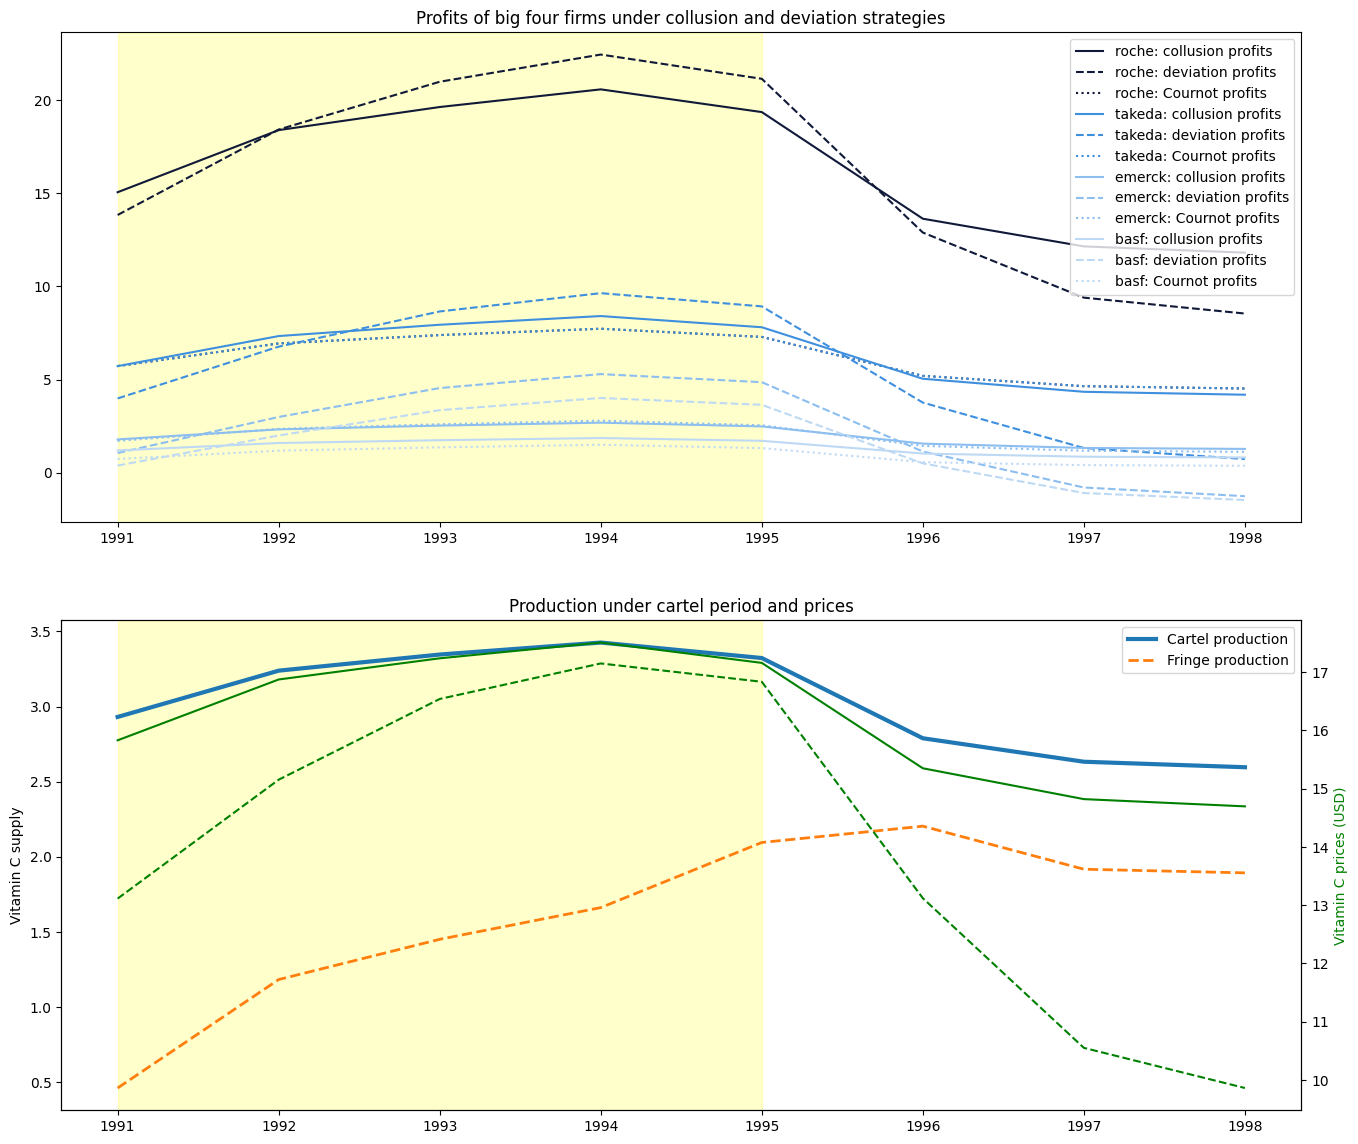

In [16]:
fig8,ax8 = plt.subplots(2,1,figsize=(16,14))
ax81b = ax8[1].twinx()

for firm in cartel:
    ax8[0].plot(
        range(1991,1+1998),
        df[df.index.get_level_values('year').isin(range(1991,1+1998))]['πcoll_{0:s}'.format(firm)],
        color = colors[firm],
        label="{0:s}: collusion profits".format(firm),
        linestyle='solid'
    )
    ax8[0].plot(
        range(1991,1+1998),
        df[df.index.get_level_values('year').isin(range(1991,1+1998))]['πdev_{0:s}'.format(firm)],
        color = colors[firm],
        label="{0:s}: deviation profits".format(firm),
        linestyle='dashed'
    )
    ax8[0].plot(
        range(1991,1+1998),
        cournot_df[df.index.get_level_values('year').isin(range(1991,1+1998))]['π_{0:s}'.format(firm)],
        color = colors[firm],
        label="{0:s}: Cournot profits".format(firm),
        linestyle='dotted'
    )
    # ax8[1].plot(
    #     range(1991,1+1998),
    #     cartel_shares['q_{0:s}'.format(firm)]*df[df.index.get_level_values('year').isin(range(1991,1+1998))].Qc,
    #     color = colors[firm],
    #     label="{0:s}: collusion prod".format(firm),
    #     linestyle='solid'
    # )
    # ax8[1].plot(
    #     range(1991,1+1998),
    #     df[df.index.get_level_values('year').isin(range(1991,1+1998))]['qdev_{0:s}'.format(firm)],
    #     color = colors[firm],
    #     label="{0:s}: deviation prod".format(firm),
    #     linestyle='dashed'
    # )

ax8[0].set_xticks(range(1991,1+1998));
ax8[0].set_xticklabels(range(1991,1+1998));
ax8[0].axvspan(cartel_years_2[0], cartel_years_2[-1], color='yellow', alpha=0.2)
ax8[0].set_title("Profits of big four firms under collusion and deviation strategies")
ax8[0].legend()

ax8[1].plot(
    range(1991,1+1998),
    df[df.index.get_level_values('year').isin(range(1991,1+1998))].Q_monop,
    linewidth=3,
    label="Cartel production"
)
ax8[1].plot(
    range(1991,1+1998),
    df[df.index.get_level_values('year').isin(range(1991,1+1998))].q_fri,
    linewidth=2,
    linestyle='--',
    label="Fringe production"
)
ax8[1].set_ylabel("Vitamin C supply")

ax81b.plot(
    range(1991,1+1998),
    df[df.index.get_level_values('year').isin(range(1991,1+1998))].P_monop,
    color='green',
    label='Collusion price'
)
ax81b.plot(
    range(1991,1+1998),
    df[df.index.get_level_values('year').isin(range(1991,1+1998))].P,
    linestyle='--',
    color='green',
    label='Real price'
)
ax81b.set_ylabel("Vitamin C prices (USD)", color="green")

ax8[1].set_xticks(range(1991,1+1998));
ax8[1].set_xticklabels(range(1991,1+1998));
ax8[1].axvspan(cartel_years_2[0], cartel_years_2[-1], color='yellow', alpha=0.2)
ax8[1].set_title("Production under cartel period and prices")
ax8[1].legend()

## Incentive Compatibility Constraint
- Cartel profits for firm $j$: $\pi_{j,t}^{(coll)} = s_j Q_{c,t}\big( P_t(Q_{c,t} - c_j) \big)$
- Cournot profits for firm $j$: $\pi_{j,t}^{(cournot)} = q_{j,t}^{(cournot)} \bigg[ \frac{Q_{f,t}+\sum_{j' \in C}{q_{j',t}^{(cournot)}} - \epsilon_t}{\alpha_1} - c_j \bigg]$

For continuation of the Cartel, the following ICC conditions must hold **for all firms and at all times** during Cartel enforcement:
$$(ICC_{j,t}): \quad \sum_{t' \geq t}{\bigg(\beta_j^{t'-t}\mathbb{E}\big[ \pi_{j,t'}^{(coll)} \mid \mathcal{I}_{j,t} \big]\bigg)} \geq \pi_{j,t}^{(dev)} + \sum_{t' > t}{\bigg(\beta_j^{t'-t}\mathbb{E}\big[ \pi_{j,t'}^{(cournot)} \mid \mathcal{I}_{j,t} \big]\bigg)}$$

Rearranging:
$$(ICC_{j,t}): \quad \pi_{j,t}^{(dev)} - \pi_{j,t}^{(coll)} \leq \sum_{t' > t}{\bigg(\beta_j^{t'-t}\mathbb{E}\big[ \pi_{j,t'}^{(coll)} - \pi_{j,t'}^{(cournot)} \mid \mathcal{I}_{j,t} \big]\bigg)}$$

We thus define:
$$ICC_{j,t} \equiv \sum_{t' > t}{\bigg(\beta_j^{t'-t}\mathbb{E}\big[ \pi_{j,t'}^{(coll)} - \pi_{j,t'}^{(cournot)} \mid \mathcal{I}_{j,t} \big]\bigg)} - \big(\pi_{j,t}^{(dev)} - \pi_{j,t}^{(coll)}\big)$$

Here we can show that since firms expect the demand shifter and fringe supply to be constant from their last known value, firms have constant expectations for future profits under each scenario: $\hat{\pi_{j}^{(coll)}}$, $\hat{\pi_{j}^{(cournot)}}$ and $\hat{\pi_{j}^{(dev)}}$ without a time-dependence on when the situation switches in the future, meaning we can factor the sum in the expression of ICC. However, the ICC still depends on the time $t$ at which it is evaluated.

The ICC of firm We can thus rewrite:
$$\hat{ICC_{j,t}} = \frac{\beta}{1-\beta}\bigg( \mathbb{E}[\pi_j^{(coll)} - \pi_j^{(cournot)} \mid \mathcal{I}_{j,t}]\bigg) - \big( \pi_{j}^{(dev)} - \pi_{j}^{(coll)} \big) $$

which in this case, simplifies to:
$$\hat{ICC_{j,t}} = \frac{\beta}{1-\beta}\bigg( \pi_j^{(coll)} - \pi_j^{(cournot)} \bigg) - \big( \pi_{j}^{(dev)} - \pi_{j}^{(coll)} \big) $$

or equivalently:
$$\hat{ICC_{j,t}} = \frac{1}{1-\beta}\pi_j^{(coll)} - \frac{\beta}{1-\beta}\pi_j^{(cournot)} - \pi_j^{(dev)} $$

In [17]:
β = 0.8

for firm in cartel:
    df['ICC_{0:s}'.format(firm)] = (1/(1-β))*df['πcoll_{0:s}'.format(firm)] - (β/(1-β))*cournot_df['π_{0:s}'.format(firm)] - df['πdev_{0:s}'.format(firm)]

In [18]:
df

,I_cartel,P,Q,q_basf,q_emerck,q_roche,q_takeda,q_fri,Qc,Q_monop,...,πcoll_emerck,qdev_emerck,πdev_emerck,πcoll_basf,qdev_basf,πdev_basf,ICC_roche,ICC_takeda,ICC_emerck,ICC_basf
year,,,,,,,,,,,,,,,,,,,,,
1980,0,10.932500,2.68177,0.00000,0.34863,1.36770,0.48272,0.48272,2.19905,1.842138,...,0.425758,0.424967,0.151160,0.209811,0.282996,-0.043342,14.897527,-2.246114,0.946814,1.076556
1981,0,11.659167,2.89156,0.00000,0.34699,1.56144,0.52048,0.46265,2.42891,2.064298,...,0.637854,0.547537,0.409351,0.360141,0.403013,0.092498,18.513953,-2.005812,0.977763,1.502976
1982,0,11.310000,2.73986,0.13699,0.32878,1.47953,0.52057,0.27399,2.46587,2.031253,...,0.604116,0.529306,0.250460,0.336077,0.385161,-0.018906,18.126091,-1.912698,1.096247,1.535783
1983,0,10.857500,2.88158,0.14408,0.31697,1.52724,0.54750,0.34579,2.53579,1.999441,...,0.572359,0.511754,0.053563,0.313473,0.367975,-0.156129,17.842043,-1.761690,1.253384,1.595676
1984,0,10.525000,2.95320,0.20672,0.35438,1.62426,0.53158,0.23626,2.71694,2.040951,...,0.613938,0.534656,-0.129354,0.343077,0.390400,-0.305836,18.902810,-1.426403,1.488014,1.845961
1985,1,9.956667,2.94722,0.14736,0.35367,1.62097,0.53050,0.29472,2.65250,1.924866,...,0.500695,0.470609,-0.289823,0.262646,0.327688,-0.379068,17.068803,-1.519242,1.500265,1.630948
1986,1,9.964167,3.02046,0.15102,0.30205,1.63105,0.60409,0.33225,2.68821,1.943827,...,0.518547,0.481071,-0.303689,0.275282,0.337931,-0.396823,17.421587,-1.459939,1.539107,1.697269
1987,1,11.140833,3.10553,0.15528,0.21739,1.83226,0.59005,0.31055,2.79498,2.170845,...,0.751852,0.606322,0.096052,0.441787,0.460573,-0.176884,21.101731,-1.284810,1.415165,2.013810
1988,1,12.461667,3.26616,0.16331,0.35928,1.82905,0.65323,0.26129,3.00487,2.470697,...,1.115383,0.771758,0.765788,0.704781,0.622562,0.277117,26.803609,-0.770486,1.043997,2.141162


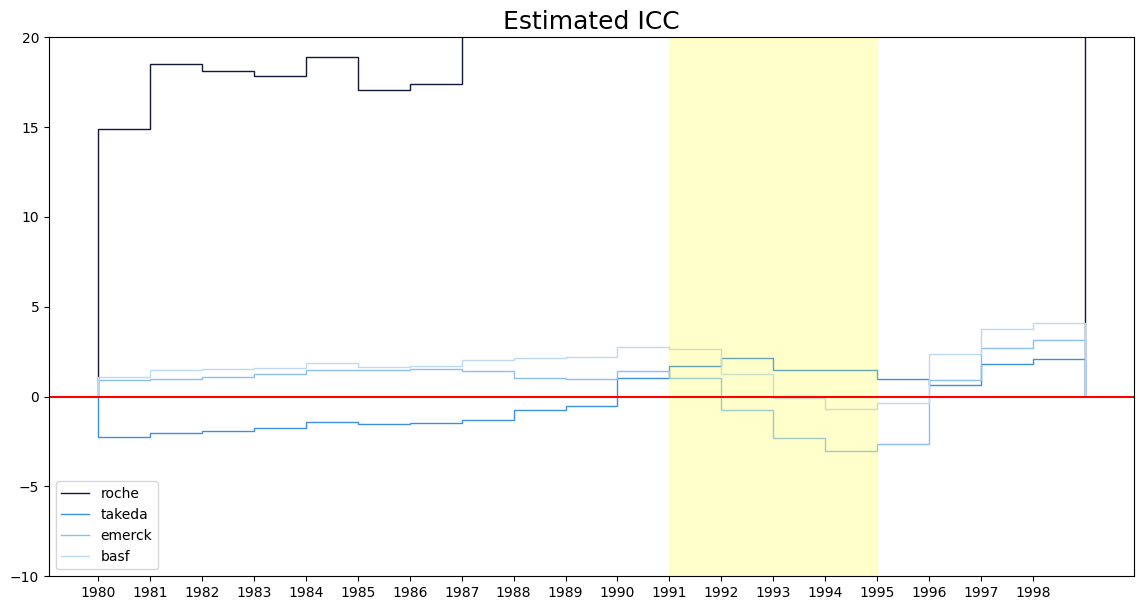

In [19]:
fig10,ax10 = plt.subplots(1,1,figsize=(14,7))

for firm in cartel:
    ax10.stairs(
        df[df.index.get_level_values('year').isin(range(1980,1+1998))]['ICC_{0:s}'.format(firm)],
        edges = edges,
        fill=False,
        color = colors[firm],
        label="{0:s}".format(firm),
    )

ax10.axhline(y=0, color='r')
ax10.set_xticks(range(1980,1+1998));
ax10.set_xticklabels(range(1980,1+1998));
ax10.axvspan(cartel_years_2[0], cartel_years_2[-1], color='yellow', alpha=0.2)

ax10.set_ylim(-10,20)
ax10.set_title("Estimated ICC", fontsize=18)
ax10.legend()

## 11.a - Entry with conservation of the cartel 

A new firm is considering entry into the market in 1995, with marginal cost = $c_{Roche} = 5.9$.

We consider two scenarios for the entry game:

1.   (Scenario #1) Incumbent firms continue to operate as a cartel, taking as given the production of the entrant and the fringe. The entrant enters without joining the coalition. We find quantities which maximize the entrant's profit, and calculate the response of the cartel for each candidate entrant quantity.

At time $t$, the entrant $e$ would determine its optimal supply conditional on entry by solving:
$$max_{q_{e,t}}\bigg[ q_{e,t}\big(P(q_{e,t} \mid Q_{c,t}, Q_{f,t}, \epsilon_t) - c_e \big) \bigg]$$

A first-order condition yields:
$$q_{e,t}(c_e) = \frac{1}{2}\big[ \epsilon_t + \alpha_1 c_e - Q_{c,t} - Q_{f,t} \big]$$

Ceteris paribus, the corresponding prices are:
$$P_t(c_e \mid \textrm{Entry}) = \frac{1}{2}\big[ c_e + \frac{Q_{c,t} + Q_{f,t} - \epsilon_t}{\alpha_1} \big]$$

Conditional to entering, the entrant's profit would be:
$$\pi_{e,t}(c_e) = -\frac{\alpha_1}{4}\bigg[ \frac{Q_{c,t}+Q_{f,t}-\epsilon_t}{\alpha_1} \bigg]^2$$
Notice that as $\alpha_1 < 0$, **these profits are always non-negative**, such that under the assumptions listed above, **the entrant always (weakly) have the incentive to enter the market!**
The entrant's profit would be null (ie, minimal) when its marginal cost is the price of the market that does not factor in its own production, call it $P_{\\e}$

To study the response of the cartel, we need to evaluate the ICC of each cartel member as a function of the new "fringe" supply and price, factoring in the entrant's supply. For each entrant's supply level, we will compute the ICC of each cartel member. Combining this with the mapping from entrant's MC to supply, this will provide the situation roll-out for each possible entrant's marginal cost, in particular for the case $c_e = c_{Roche}$.

In [20]:
def get_responses(year:int, q_fri: pd.Series):
    Qcoll = 0.5*(α1*c_roche + ε1.loc[year] - q_fri)
    Pcoll = (q_fri + Qcoll - ε1.loc[year])/α1
    dct_coll = {}
    dct_dev = {}

    M = np.ones((4,4)) + np.eye(4)
    cournot = np.linalg.inv(M).dot( α1*c1.to_numpy().reshape((4,1)) + np.tile((ε1.loc[year]-q_fri).to_numpy(),(4,1)) ).T
    df_cournot = pd.DataFrame(cournot, columns=['q_basf','q_emerck','q_roche','q_takeda'])
    df_cournot["Qc"] = df_cournot.sum(axis=1)
    df_cournot["Q"] = df_cournot["Qc"] + q_fri
    df_cournot["P"] = (1/α1)*(df_cournot["Q"] - ε1.loc[year])

    for firm in cartel:
        dct_coll['q_{0:s}'.format(firm)] = cartel_shares['q_{0:s}'.format(firm)]*Qcoll
        dct_coll['π_{0:s}'.format(firm)] = dct_coll['q_{0:s}'.format(firm)]*(Pcoll - c1['q_{0:s}'.format(firm)])

        dct_dev['q_{0:s}'.format(firm)] = 0.5*(α1*c1['q_{0:s}'.format(firm)] + ε1.loc[year] - q_fri - (1-cartel_shares['q_{0:s}'.format(firm)])*Qcoll)
        dct_dev['π_{0:s}'.format(firm)] = dct_dev['q_{0:s}'.format(firm)]*((1/α1)*(q_fri+(1-cartel_shares['q_{0:s}'.format(firm)])*Qcoll + dct_dev['q_{0:s}'.format(firm)] - ε1.loc[year]) - c1['q_{0:s}'.format(firm)])
    
        df_cournot['π_{0:s}'.format(firm)] = df_cournot['q_{0:s}'.format(firm)]*(df_cournot["P"] - c1['q_{0:s}'.format(firm)])

    df_coll = pd.DataFrame(dct_coll)
    df_coll["Qc"] = Qcoll
    df_coll["Q"] = df_coll["Qc"] + q_fri
    df_coll["P"] = Pcoll
    df_coll.index = q_fri

    df_dev = pd.DataFrame(dct_dev)
    df_dev.index = q_fri

    df_cournot.index = q_fri

    return df_coll, df_dev, df_cournot

    
def get_ICC(df_coll:pd.DataFrame, df_dev:pd.DataFrame, df_cournot:pd.DataFrame, β = 0.8) -> pd.DataFrame:
    dct = {}
    for firm in cartel:
        dct['ICC_{0:s}'.format(firm)] = (1/(1-β))*df_coll['π_{0:s}'.format(firm)] - (β/(1-β))*df_cournot['π_{0:s}'.format(firm)] - df_dev['π_{0:s}'.format(firm)]
    ICC = pd.DataFrame(dct)
    ICC.index = df_coll.index
    return ICC

def get_entrant_qty(c_e: float, df: pd.DataFrame) -> pd.DataFrame:
    Qmonop = 0.5*(α1*c_roche + ε1 - df.q_fri)
    Pmonop = (df.q_fri + Qmonop - ε1)/α1
    q_e = 0.5*(ε1 + α1*c_e - Qmonop - df.q_fri)
    P_e = 0.5*(c_e + Pmonop)
    π_e = -0.25*α1*(Pmonop - c_e)*(Pmonop - c_e)
    df_e = pd.concat([q_e,Qmonop,df.q_fri,P_e,π_e,Pmonop],axis=1)
    df_e.index = df.index
    df_e.rename(columns={0:"q_e", 1:"Q_c", 2:"P_e", 3:"π_e", 4:"P_monop"}, inplace=True)
    return df_e

def entrant_response(q_e: pd.Series, df: pd.DataFrame, year:int) -> pd.DataFrame:
    q_fri = df.loc[year].q_fri + q_e
    df_coll, df_dev, df_cournot = get_responses(year, q_fri) # !!All indexed by a potential entrant supply!!
    ICC = get_ICC(df_coll, df_dev, df_cournot) # !!All indexed by a potential entrant supply!!
    fig11, ax11 = plt.subplots(1,1,figsize=(14,7))
    for firm in cartel:
        ax11.plot(
            q_e.to_numpy(),
            ICC['ICC_{0:s}'.format(firm)],
            color = colors[firm],
            label="{0:s}".format(firm),
        )

    ax11.axhline(y=0, color='r')
    ax11.set_title("Estimated ICC as a function of entrant supply", fontsize=18)
    ax11.set_xlabel("Entrant's supply", fontsize=14)
    ax11.set_ylabel("Incumbent cartel members ICC", fontsize=14)
    ax11.legend()

    return ICC, fig11, ax11
    

In [21]:
df_e = get_entrant_qty(c_e=c_roche, df=df)
print("""
Entrant in 1995 with Roche's MC would enter and produce {0:.2f}
Resulting total supply: {1:.2f} -> {2:.2f}
Resulting price: ${3:.2f} -> ${4:.2f}
""".format(
    df_e.loc[1995].q_e,
    df.loc[1995].Q,
    df_e.loc[1995].q_e + df_e.loc[1995].Q_c + df_e.loc[1995].q_fri,
    df.loc[1995].P,
    df_e.loc[1995].P_e,
    )
)


Entrant in 1995 with Roche's MC would enter and produce 1.66
Resulting total supply: 5.51 -> 7.08
Resulting price: $16.84 -> $11.53



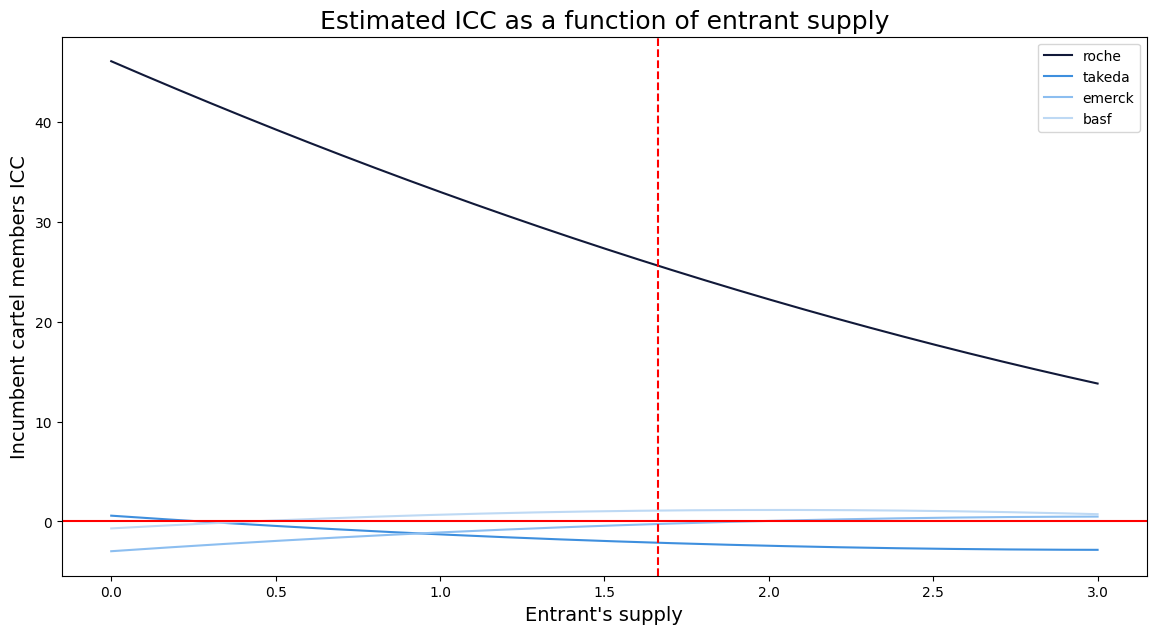

In [22]:
#q_e = df_e.loc[1995].q_e
q_e = pd.Series(np.linspace(0,3,300), name="q_e")
ICC, fig11, ax11 = entrant_response(q_e, df, year=1995)
ax11.axvline(x=df_e.loc[1995].q_e, color='r', linestyle='--')

As we can see above, for an entrant in 1995 with Roche's marginal cost, producing $q_e = 1.66$, the market that result from entrance sees two cartel members (Takeda and Merck) with negative ICCs! In a setting where there ICCs were originally positive, this would mean that, upon entrance, the cartel would become "incentively unstable". 

Notice that in the scenario above, for any quantity produced by the entrant, there is always at least one cartel member that has an incentive to deviate, in the sense that its ICC is negative. Therefore, for any production cost of the entrant, the cartel becomes unstable. And for any cost, we've shown that the entrant is at least weakly better off entering the market! This does not bode well for the cartel...

This motivates the second analysis below, where everyone revers to Cournot competition.

## 11.b - Back to Cournot competition
Here, entry causes the cartel to collapse, so there is Cournot competition between all firms, taking as given the fringe quantity. We find quantities which arise under Cournot competition among all firms given a residual demand curve that accounts for the fringe.

In [53]:
M = np.ones((5,5)) + np.eye(5)
df_q11 = df.copy()
c1["q_entrant"] = c_roche
new_oligopoly = cartel + ['entrant']

cournot = np.linalg.inv(M).dot( α1*c1.to_numpy().reshape((5,1)) + np.tile((ε1 - df.q_fri).to_numpy(),(5,1)) ).T
df_cournot = pd.DataFrame(cournot, columns=['q_basf','q_emerck','q_takeda','q_roche','q_entrant'])
df_cournot.index = df_q11.index

df_cournot["Qc"] = df_cournot.sum(axis=1)
df_cournot["q_fri"] = df.q_fri
df_cournot["Q"] = df_cournot["Qc"] + df.q_fri
df_cournot["P"] = (1/α1)*(df_cournot["Q"] - ε1)

for firm in new_oligopoly:
    df_cournot['π_{0:s}'.format(firm)] = df_cournot['q_{0:s}'.format(firm)]*(df_cournot["P"] - c1['q_{0:s}'.format(firm)])

df_cournot = df_cournot[df_cournot.index.get_level_values("year").isin(range(1995,1999))]



The following DataFrame summarises the (static) Cournot strategies after entry of the new firm in 1995.

In [54]:
df_cournot

,q_basf,q_emerck,q_takeda,q_roche,q_entrant,Qc,q_fri,Q,P,π_roche,π_takeda,π_emerck,π_basf,π_entrant
year,,,,,,,,,,,,,,
1995,0.284800,0.526392,0.707812,1.709162,1.709162,4.937327,2.09553,7.032857,11.691278,9.898232,1.697566,0.938878,0.274834,9.898232
1996,0.106807,0.348399,0.529819,1.531169,1.531169,4.047363,2.20412,6.251483,11.088172,7.943969,0.951144,0.411287,0.038654,7.943969
1997,0.054725,0.296317,0.477737,1.479087,1.479087,3.786955,1.91756,5.704515,10.911700,7.412742,0.773338,0.297512,0.010148,7.412742
1998,0.042513,0.284105,0.465525,1.466876,1.466876,3.725895,1.89333,5.619225,10.870321,7.290843,0.734307,0.273495,0.006124,7.290843


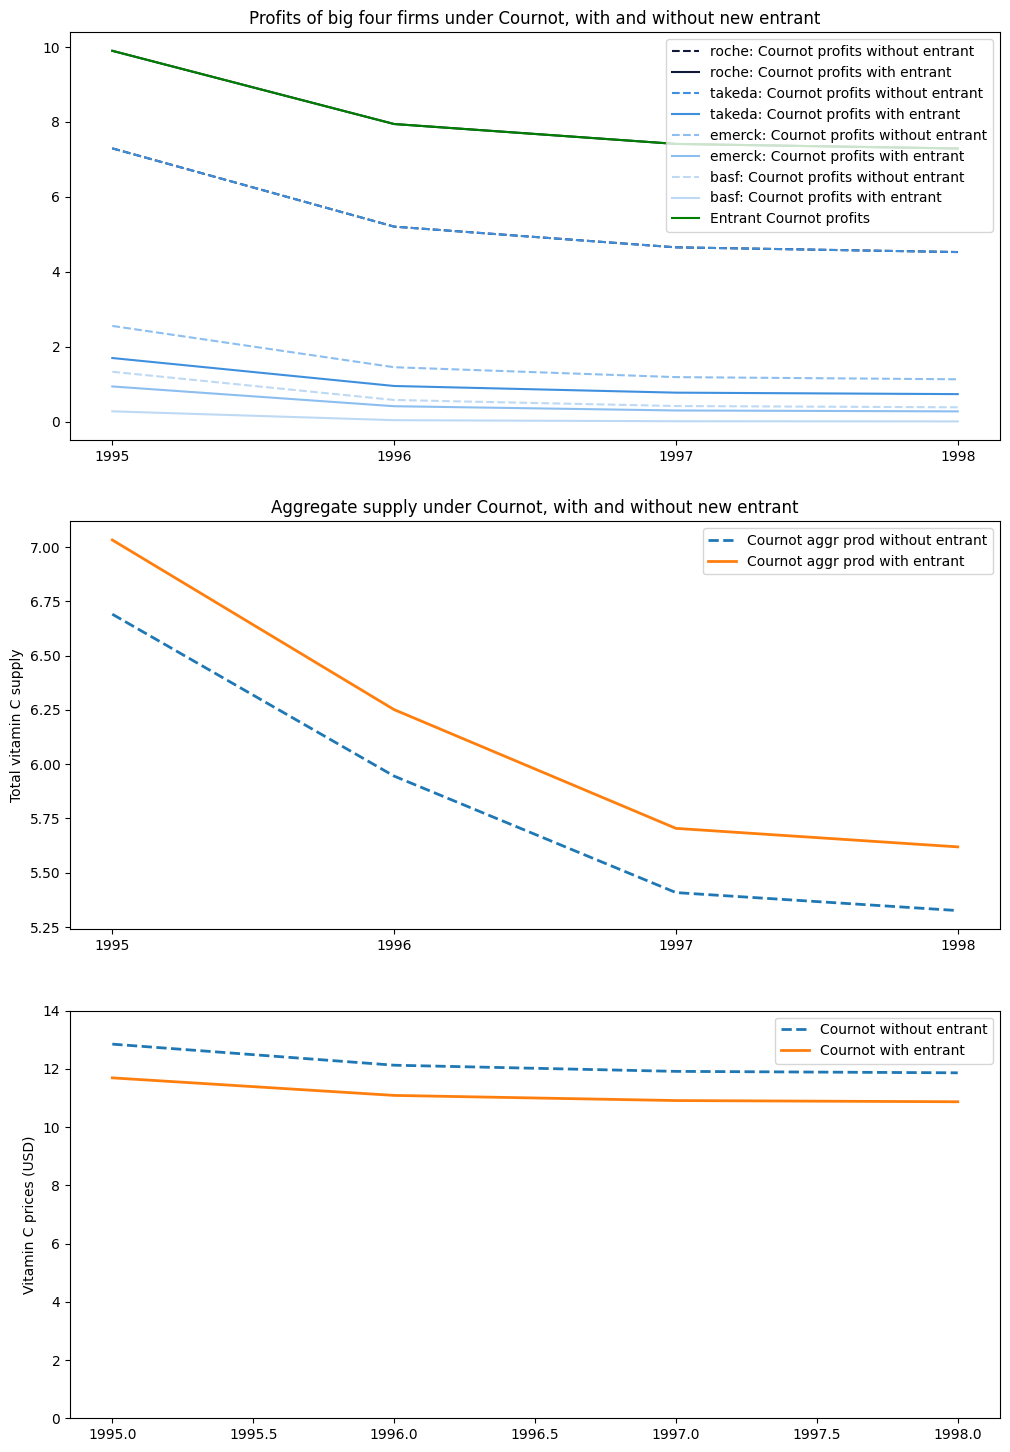

In [65]:
fig11b, ax11b = plt.subplots(3,1,figsize=(12,18))
colors["entrant"] = "green"

for firm in cartel:
    ax11b[0].plot(
        range(1995,1+1998),
        cournot_df[df.index.get_level_values('year').isin(range(1995,1+1998))]['π_{0:s}'.format(firm)],
        color = colors[firm],
        label="{0:s}: Cournot profits without entrant".format(firm),
        linestyle='--'
    )
    ax11b[0].plot(
        range(1995,1+1998),
        df_cournot['π_{0:s}'.format(firm)],
        color = colors[firm],
        label="{0:s}: Cournot profits with entrant".format(firm),
        linestyle='-'
    )

ax11b[0].plot(
        range(1995,1+1998),
        df_cournot['π_entrant'],
        color = "green",
        label="Entrant Cournot profits",
        linestyle='-'
    )

ax11b[0].set_xticks(range(1995,1+1998));
ax11b[0].set_xticklabels(range(1995,1+1998));
ax11b[0].set_title("Profits of big four firms under Cournot, with and without new entrant")
ax11b[0].legend()


ax11b[1].plot(
    range(1995,1+1998),
    cournot_df[df.index.get_level_values('year').isin(range(1995,1+1998))].Q,
    linewidth=2,
    linestyle='--',
    label="Cournot aggr prod without entrant"
)
ax11b[1].plot(
    range(1995,1+1998),
    df_cournot.Q,
    linewidth=2,
    label="Cournot aggr prod with entrant"
)
ax11b[1].set_ylabel("Total vitamin C supply")
ax11b[1].set_xticks(range(1995,1+1998));
ax11b[1].set_xticklabels(range(1995,1+1998));
ax11b[1].set_title("Aggregate supply under Cournot, with and without new entrant")
ax11b[1].legend()

ax11b[2].plot(
    range(1995,1+1998),
    cournot_df[df.index.get_level_values('year').isin(range(1995,1+1998))].P,
    linewidth=2,
    linestyle='--',
    label='Cournot without entrant'
)
ax11b[2].plot(
    range(1995,1+1998),
    df_cournot.P,
    linewidth=2,
    label='Cournot with entrant'
)
ax11b[2].set_ylabel("Vitamin C prices (USD)")
ax11b[2].set_ylim(0,14)
ax11b[2].legend()

As the entrant has the exact same production structure as Roche (by assumption), it ends up having the same production behavior. Overall production ends up being higher with the entrant, compared to a Cournot oligopoly with only the four historical firms (+ fringe production). As a result, prices go down. As we would expect, as the market power of all historical firms decrease and as we get sligthly closer to perfect competition, profits of all historical firms decrease.